In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#### 1. Вывести: кол-во наблюдений в датасете

In [3]:
len(df)

4622

#### 2. Вывести названия столбцов

In [4]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе

In [5]:
print(*df.item_name.mode())

Chicken Bowl


#### 4. Построить гистрограмму частоты заказов по позициям (item)

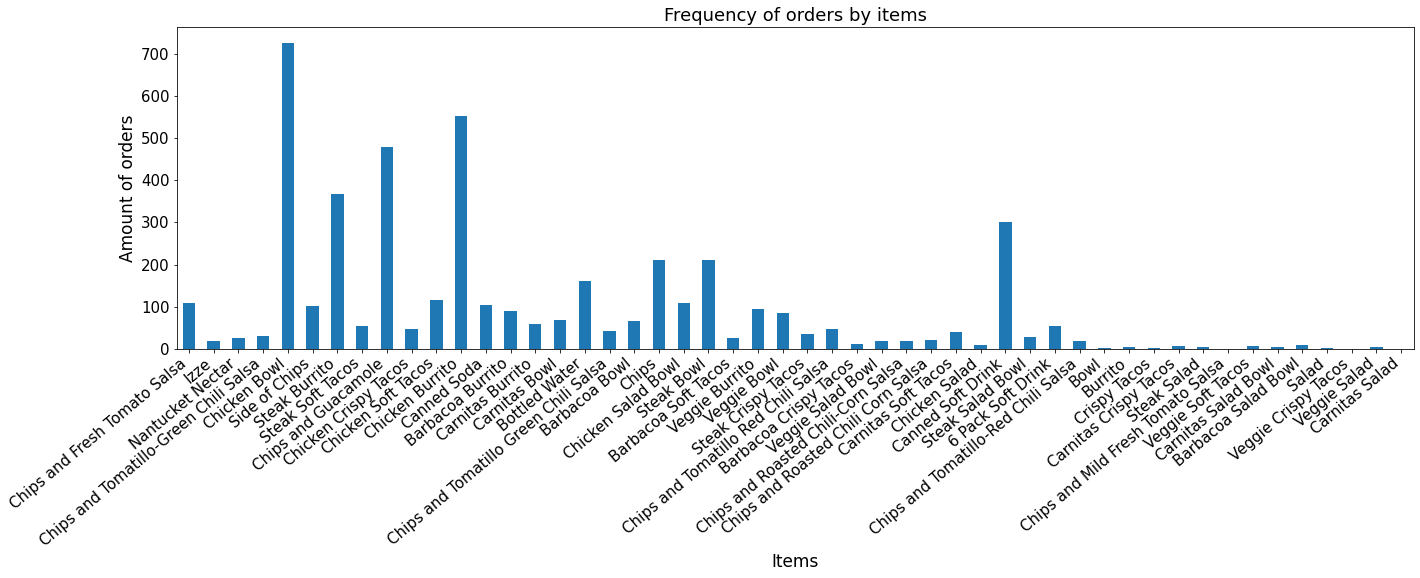

In [6]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
group = df.groupby('item_name', sort=False).order_id.count().reset_index()
ax = group.plot(x='item_name', y="order_id", kind="bar", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Items", ylabel = "Amount of orders")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.tight_layout()
plt.title('Frequency of orders by items')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [7]:
if df.dtypes['item_price'] == 'object':
    df['item_price'] = df['item_price'].apply(lambda row: float(row[1:]))

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

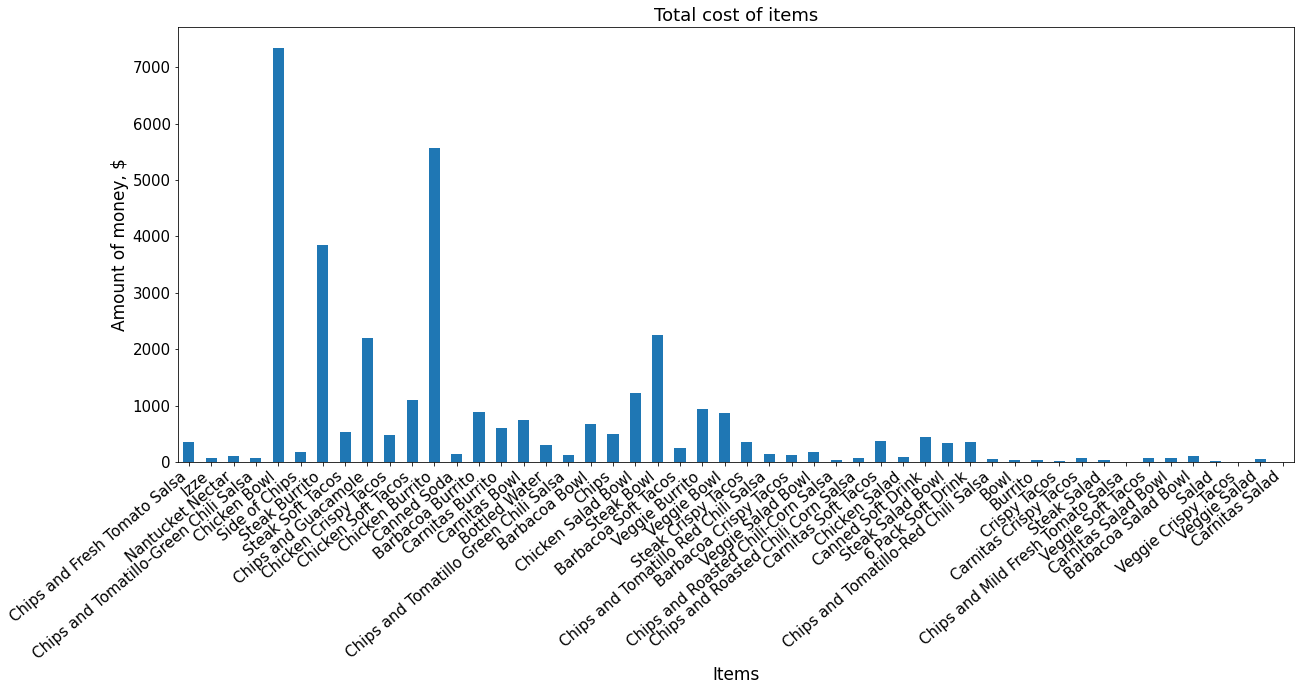

In [8]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
group = df.groupby('item_name', sort=False).item_price.agg(np.sum)
ax = group.plot(y="item_price", kind="bar", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Items", ylabel = "Amount of money, $")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.title('Total cost of items')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [9]:
#first way
avg = df.groupby('order_id', sort=False).item_price.sum().mean()
print(f'${round(avg, 2)}')
#second way
print(f'${round(df.item_price.sum() / df.order_id.nunique(), 2)}')
df.groupby('order_id', sort=False)

$18.81
$18.81


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [10]:
group = df.groupby('order_id', sort=False).item_name.nunique().reset_index()
group.agg({
    'item_name': ['mean', 'min', 'max', 'median'],
})

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


#### 9. Определить статистику заказов стейков,

In [11]:
steaks = df[df.item_name.str.contains("Steak")]
steaks[["quantity", "item_price"]].describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


#### а также статистику заказов прожарки.

In [12]:
roasting = df[df.choice_description.str.contains("Mild|Mmedium|Hot", na=False)]
roasting[["quantity", "item_price"]].describe()

,quantity,item_price
count,580.000000,580.000000
mean,1.062069,9.854534
std,0.248538,2.706092
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [13]:
df['item_price_rubles'] = round(df.item_price * 71.56, 2)
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.03
1,1,1,Izze,[Clementine],3.39,242.59
2,1,1,Nantucket Nectar,[Apple],3.39,242.59
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,171.03
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1215.09


#### 11. Сгруппировать заказы по входящим позициям в него.

In [14]:
df['price_for_one_item'] = df['item_price'] / df['quantity']
df[(df.item_name.str.contains('Chips and Guacamole')) & (df.price_for_one_item == 4.45)]

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles,price_for_one_item
10,5,1,Chips and Guacamole,NaN,4.45,318.44,4.45
14,7,1,Chips and Guacamole,NaN,4.45,318.44,4.45
20,10,1,Chips and Guacamole,NaN,4.45,318.44,4.45
37,18,1,Chips and Guacamole,NaN,4.45,318.44,4.45
41,20,1,Chips and Guacamole,NaN,4.45,318.44,4.45
...,...,...,...,...,...,...,...
4588,1824,1,Chips and Guacamole,NaN,4.45,318.44,4.45
4596,1826,1,Chips and Guacamole,NaN,4.45,318.44,4.45
4600,1827,1,Chips and Guacamole,NaN,4.45,318.44,4.45
4605,1828,1,Chips and Guacamole,NaN,4.45,318.44,4.45


### Отдельно сгруппировать по стейкам во всех видах прожарках.

In [15]:
group2 = steaks.groupby('item_name', sort=False).sum()
group2[['quantity', 'item_price']]

,quantity,item_price
item_name,,
Steak Burrito,386,3851.43
Steak Soft Tacos,56,536.05
Steak Bowl,221,2260.19
Steak Crispy Tacos,36,357.34
Steak Salad Bowl,31,343.59
Steak Salad,4,35.66


#### 12. Определить цену по каждой позиции в отдельности.

In [16]:
df['price_for_one_item'] = df['item_price'] / df['quantity']
df[(df.item_name.str.contains('Chips and Guacamole')) & (df.price_for_one_item == 4.45)]

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles,price_for_one_item
10,5,1,Chips and Guacamole,NaN,4.45,318.44,4.45
14,7,1,Chips and Guacamole,NaN,4.45,318.44,4.45
20,10,1,Chips and Guacamole,NaN,4.45,318.44,4.45
37,18,1,Chips and Guacamole,NaN,4.45,318.44,4.45
41,20,1,Chips and Guacamole,NaN,4.45,318.44,4.45
...,...,...,...,...,...,...,...
4588,1824,1,Chips and Guacamole,NaN,4.45,318.44,4.45
4596,1826,1,Chips and Guacamole,NaN,4.45,318.44,4.45
4600,1827,1,Chips and Guacamole,NaN,4.45,318.44,4.45
4605,1828,1,Chips and Guacamole,NaN,4.45,318.44,4.45


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.